<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com). Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_tutorial/).</i></small>

# Introduction to Scikit-Learn: Machine Learning with Python

This session will cover the basics of Scikit-Learn, a popular package containing a collection of tools for machine learning written in Python. See more at http://scikit-learn.org.

## Outline

**Main Goal:** To introduce the central concepts of machine learning, and how they can be applied in Python using the Scikit-learn Package.

- Definition of machine learning
- Data representation in scikit-learn
- Introduction to the Scikit-learn API

# Packages we'll use
## Scikit-Learn (sklearn)
[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

For this short introduction, I'm going to stick to questions of in-core processing of small to medium datasets with Scikit-learn.


## Seaborn / Matplotlib
These are both packages for data visualization in python. [Matplotlib](http://matplotlib.org/) provides the base plotting package that many visualizations build on top of, and [Seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/) is a handy way to make your plots look much cleaner, relatively quickly. 

In [1]:
%matplotlib inline

# set seaborn plot defaults.
# This can be safely commented out
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

Machine learning is all about finding **patterns** in data, and using those patterns to do useful things. Sometimes we want to investigate what kinds of patterns were found, other times we just want to use those patterns to make predictions about new data.

## Types of machine learning problems
There are two primary types of problems in machine learning. These are:
* **Classification** - attempting to predict a *categorical* variable from one or many inputs.
* **Regression** - attempting to predict a *continuous* variable from one or many inputs.

### Classification
We'll first address **classification**. Say that we've collected two variables of interest from a population, and we know that there are two types of people in this population. As such, we have 3 types of information per person:

1. Their value for feature 1
2. Their value for feature 2
3. The group they belong to (their "class" in ML terms).

We can plot these values below

In [4]:
# We'll suppress warnings so it doesn't clutter the output
import warnings
warnings.filterwarnings('ignore')

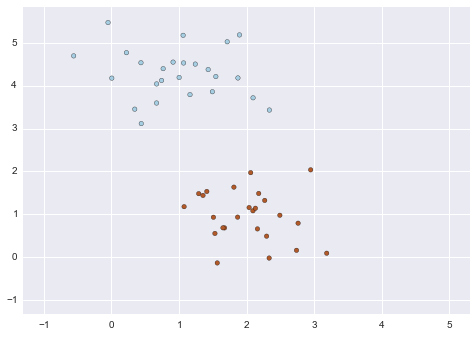

In [5]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()
ax = plt.gca()
_ = plt.setp(ax.collections[:-1], visible=False)

A **classification** algorithm asks "given this data, can I draw a *line* through this plot that will reliably divide one group from another?" Do you think this is possible?

Here's an example of one such line. We'll show the dividing line it self, along with a "padding" around it that tries to keep an equal distance between the line and the center of each group.

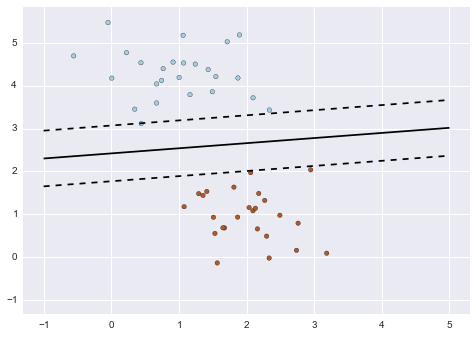

In [6]:
_ = plt.setp(ax.collections[:-1], visible=True)
ax.figure

**Most classification algorithms are variations on how to find the "right" line to separate groups, given the data**.

Importantly, the line shown above represents a more abstract assumption about the structure that our datapoints follow. We are formally modeling the difference between these two classes. This lets us **generalize** to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now **predict** whether it's a blue or a red point.

While this example is simple, imagine if we had a third dimension. Or a fourth, fifth, sixth, or six hundredth dimension. Imagine if the groups were overlapping in some places. What would be the best way to draw a line between the groups now? Much research in machine learning aims to answer this question.

*Note: If you'd like to see the source code used to generate this, you can either open the code in the `figures` directory, or you can load the code using the `%load` magic command.*

### Regression
The next simple task we'll look at is a **regression** task. In this case, we wish to predict a *continuous* output, given some inputs. For example, let's say we collect two variables, and we want to know the *relationship* between them:

In [ ]:
from fig_code import plot_linear_regression
plot_linear_regression()
ax = plt.gca()
_ = plt.setp(ax.lines, visible=False)

What's the relationship between `x` and `y`? In this case, it looks like one could be **modeled** as a linear function of the other. This just means that we can draw a line through this cloud of points, and it would do a good job of explaining the relationship between them:

In [ ]:
_ = plt.setp(ax.lines, visible=True)
ax.figure

Similarly to classification, by fitting a line to the data we are modeling the underlying relationship that exists between `x` and `y`. However, in the case of regression, we are choosing a line that maximizes the chance to correctly predict `y`, given `x`.

The model has **learned** from the training data, and can be used to **generalize** to new data by predicting new values for `y` given a value of `x` that it hasn't seen before.

> **What is the main difference between classification and regression?**

# Utilizing Machine Learning in Python
As we've discussed above, the goal of machine learning is to **learn** the underlying structure in the data to accomplish a given task (either *classification* or *regression*). There are hundreds of algorithms to do this, and just as many packages that implement these algorithms.

This tutorial focuses on the most flexible and user-friendly package for doing machine learning in Python: **scikit-learn**. 
## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.  Along with this, we'll build on our matplotlib examples from the previous section and show some examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a **two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.

The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.

> **What kind of data would we expect as an output in **classification** algorithms?**

> **What about **regression** algorithms?**

## A Simple Example: the Iris Dataset

There are a number of "toy" problems in machine learning that we can use to illustrate its principles. One of the most famous is the "Iris" dataset
As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

In [ ]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

> **If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

> **What would the `n_samples` refer to?**

> **What might the `n_features` refer to?**

Remember that there must be a **fixed** number of features for each sample, and feature number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.keys()

In [ ]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

In [ ]:
print(iris.data.shape)
print(iris.target.shape)

In [ ]:
# These are the target "classes", aka the species of each flower.
print(iris.target)

In [ ]:
print(iris.target_names)

This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

In [ ]:
print(iris.feature_names)

In [ ]:
# First, we'll show the raw data
import numpy as np
import matplotlib.pyplot as plt

x_index = 1
y_index = 2

f, ax = plt.subplots()
ax.scatter(iris.data[:, x_index], iris.data[:, y_index])
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index]);

In [ ]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

f, ax = plt.subplots()
sct = ax.scatter(iris.data[:, x_index], iris.data[:, y_index],
                 c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3),
                 vmin=-.5, vmax=2.5)
f.colorbar(sct, ticks=[0, 1, 2], format=formatter)
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index]);

> **Do you think it's possible to draw a line separating each class from the other two classes?**

> **Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Other Available Data
A big part of machine learning is finding the right dataset for your question. Fortunately, scikit-learn has several datasets to make it easier to learn these methods. They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.

In [ ]:
from sklearn import datasets

In [ ]:
# Type datasets.fetch_<TAB> or datasets.load_<TAB> in IPython to see all possibilities

# datasets.fetch_

In [ ]:
# datasets.load_

In the next section, we'll use some of these datasets and take a look at the basic principles of machine learning.